In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec6_ds8/TrainSet.csv')  #randomly selected 5000k clusters

In [3]:
df_2_test = df1[100000:600000]
df_2_test = df_2_test.reset_index(drop=True)
df_2_test

,y-local,pt,0,1,2,3,4,5,6,7,...,264,265,266,267,268,269,270,271,272,ptLabel
0,-2.78621,-0.149006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,3.35684,0.370930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.33228,-0.187830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2.95454,0.177889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2.26443,0.304396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.86820,-0.541485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
499996,-5.03404,0.678523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
499997,7.67527,-0.180700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
499998,-1.02071,-0.191228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
Label = df_2_test['ptLabel']
LabelDF = pd.DataFrame(Label)

In [5]:
readInTracked = pd.read_csv('trainingSetTrackedOutputNumpyArray.csv') 
readInTracked

,y,x
0,5.590935,11.763610
1,0.741178,-2.949967
2,6.185787,11.952291
3,0.229251,-4.252941
4,8.115126,6.465592
...,...,...
499995,4.758145,0.192130
499996,6.679837,8.461007
499997,0.670506,-4.115416
499998,2.909358,-0.414306


In [6]:
concat = pd.concat([readInTracked['y'],readInTracked['x'],LabelDF],join='inner', axis=1)
concat

,y,x,ptLabel
0,5.590935,11.763610,1
1,0.741178,-2.949967,0
2,6.185787,11.952291,1
3,0.229251,-4.252941,2
4,8.115126,6.465592,0
...,...,...,...
499995,4.758145,0.192130,0
499996,6.679837,8.461007,0
499997,0.670506,-4.115416,1
499998,2.909358,-0.414306,1


In [8]:
filterLowTogether = concat[   (concat['ptLabel'] == 1) | (concat['ptLabel'] == 2)    ]
filterLowTogether

,y,x,ptLabel
0,5.590935,11.763610,1
2,6.185787,11.952291,1
3,0.229251,-4.252941,2
9,4.524487,-4.108303,1
10,11.668227,8.591564,2
...,...,...,...
499990,11.897979,3.086351,2
499991,1.782417,-3.798546,1
499994,8.217258,5.406070,2
499997,0.670506,-4.115416,1


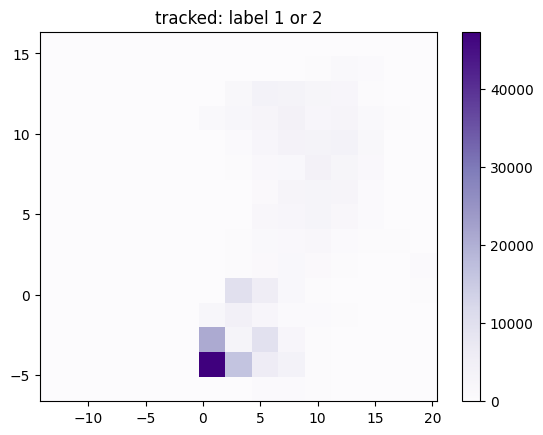

In [10]:
y = filterLowTogether['x'] # change 'x' with your column name
x = filterLowTogether['y'] # change 'y' with your column name
plt.hist2d(x, y, bins=(15, 15), cmap=plt.cm.Purples)
plt.colorbar()
#plt.show()
plt.title("tracked: label 1 or 2")
plt.show()

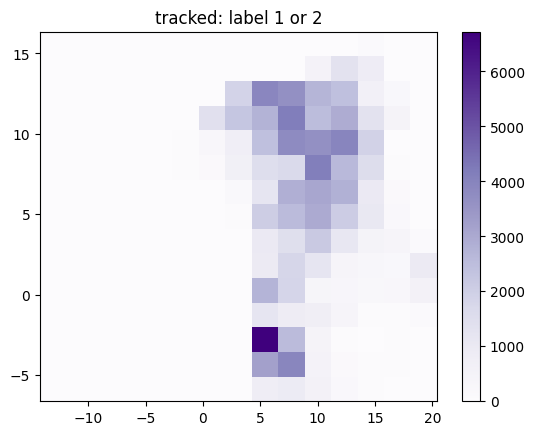

In [17]:
filterPositive = filterLowTogether[ (filterLowTogether['x'] > 5) | (filterLowTogether['y'] > 5)] 

y = filterPositive['x'] # change 'x' with your column name
x = filterPositive['y'] # change 'y' with your column name
plt.hist2d(x, y, bins=(15, 15), cmap=plt.cm.Purples)
plt.colorbar()
#plt.show()
plt.title("tracked: label 1 or 2")
plt.show()